In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/energy-consumption-generation-prices-and-weather/energy_dataset.csv
/kaggle/input/energy-consumption-generation-prices-and-weather/weather_features.csv


In [33]:
energy_df = pd.read_csv('/kaggle/input/energy-consumption-generation-prices-and-weather/energy_dataset.csv')

In [3]:
energy_df.shape

(35064, 29)

In [4]:
energy_df.head(5)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [5]:
import seaborn as sbn

In [ ]:
energy_df.columns

In [36]:
new_columns = []
for i in energy_df.columns:
    new_col_name = i.replace(' ','_')
    semi_final = new_col_name.replace('-','_')
    final = semi_final.replace('/','_')
    new_columns.append(final)
    
new_columns

['time',
 'generation_biomass',
 'generation_fossil_brown_coal_lignite',
 'generation_fossil_coal_derived_gas',
 'generation_fossil_gas',
 'generation_fossil_hard_coal',
 'generation_fossil_oil',
 'generation_fossil_oil_shale',
 'generation_fossil_peat',
 'generation_geothermal',
 'generation_hydro_pumped_storage_aggregated',
 'generation_hydro_pumped_storage_consumption',
 'generation_hydro_run_of_river_and_poundage',
 'generation_hydro_water_reservoir',
 'generation_marine',
 'generation_nuclear',
 'generation_other',
 'generation_other_renewable',
 'generation_solar',
 'generation_waste',
 'generation_wind_offshore',
 'generation_wind_onshore',
 'forecast_solar_day_ahead',
 'forecast_wind_offshore_eday_ahead',
 'forecast_wind_onshore_day_ahead',
 'total_load_forecast',
 'total_load_actual',
 'price_day_ahead',
 'price_actual']

In [37]:
energy_df.columns = new_columns

In [9]:
energy_df.head(10)

,time,generation_biomass,generation_fossil_brown_coal_lignite,generation_fossil_coal_derived_gas,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_fossil_oil_shale,generation_fossil_peat,generation_geothermal,...,generation_waste,generation_wind_offshore,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_offshore_eday_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
5,2015-01-01 05:00:00+01:00,410.0,178.0,0.0,4038.0,3590.0,156.0,0.0,0.0,0.0,...,188.0,0.0,4618.0,4.0,NaN,4617.0,21441.0,19905.0,35.72,53.63
6,2015-01-01 06:00:00+01:00,401.0,172.0,0.0,4040.0,3368.0,158.0,0.0,0.0,0.0,...,186.0,0.0,4397.0,3.0,NaN,4276.0,21285.0,20010.0,35.13,51.73
7,2015-01-01 07:00:00+01:00,408.0,172.0,0.0,4030.0,3208.0,160.0,0.0,0.0,0.0,...,189.0,0.0,3992.0,12.0,NaN,3994.0,21545.0,20377.0,36.22,51.43
8,2015-01-01 08:00:00+01:00,413.0,177.0,0.0,4052.0,3335.0,161.0,0.0,0.0,0.0,...,198.0,0.0,3629.0,39.0,NaN,3602.0,21443.0,20094.0,32.40,48.98
9,2015-01-01 09:00:00+01:00,419.0,177.0,0.0,4137.0,3437.0,163.0,0.0,0.0,0.0,...,198.0,0.0,3073.0,784.0,NaN,3212.0,21560.0,20637.0,36.60,54.20


In [ ]:
energy_df.dtypes

In [10]:
import datetime
energy_df['observation_date'] = energy_df['time'].str[:10]
energy_df['observation_hour'] = pd.to_numeric(energy_df['time'].str[11:-12])
energy_df['observation_month'] = pd.to_datetime(energy_df['time'].str[:10]).dt.month
energy_df['observation_year'] = pd.to_datetime(energy_df['time'].str[:10]).dt.year
energy_df['observation_day'] = pd.to_datetime(energy_df['time'].str[:10]).dt.day

In [11]:
energy_df_grp_date = energy_df.groupby('observation_date')[['price_day_ahead','price_actual']].sum()
energy_df_grp_hour = energy_df.groupby('observation_hour')[['price_day_ahead','price_actual']].sum()
energy_df_grp_month = energy_df.groupby('observation_month')[['price_day_ahead','price_actual']].sum()
energy_df_grp_year = energy_df.groupby('observation_year')[['price_day_ahead','price_actual']].sum()
energy_df_grp_day = energy_df.groupby('observation_day')[['price_day_ahead','price_actual']].sum()

In [ ]:
energy_df_grp_date.head(5)

In [ ]:
energy_df_grp_date.shape

<AxesSubplot:xlabel='observation_date', ylabel='price_day_ahead'>

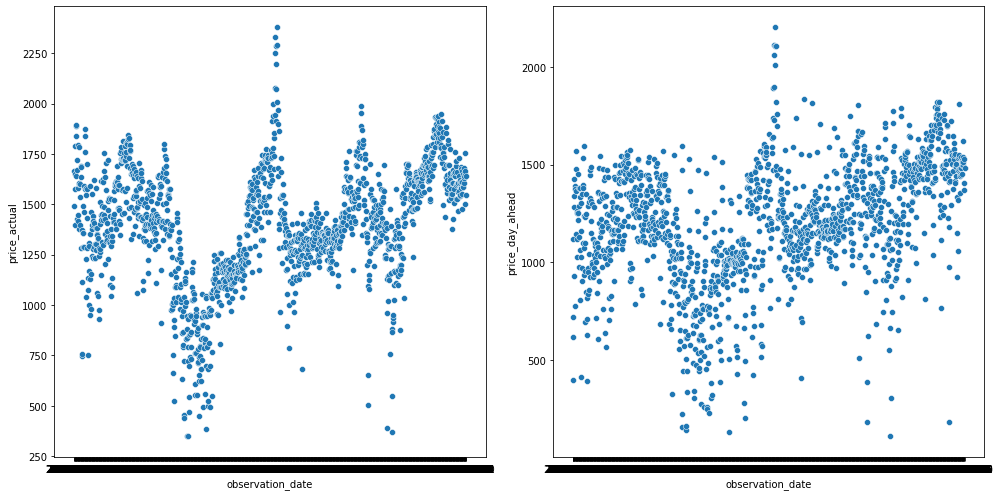

In [12]:
#sbn.set(style='whitegrid')
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)

sbn.scatterplot(x="observation_date",y="price_actual",data=energy_df_grp_date, ax=axes[0])
sbn.scatterplot(x="observation_date",y="price_day_ahead",data=energy_df_grp_date, ax=axes[1])

<AxesSubplot:xlabel='observation_date', ylabel='total_load_forecast'>

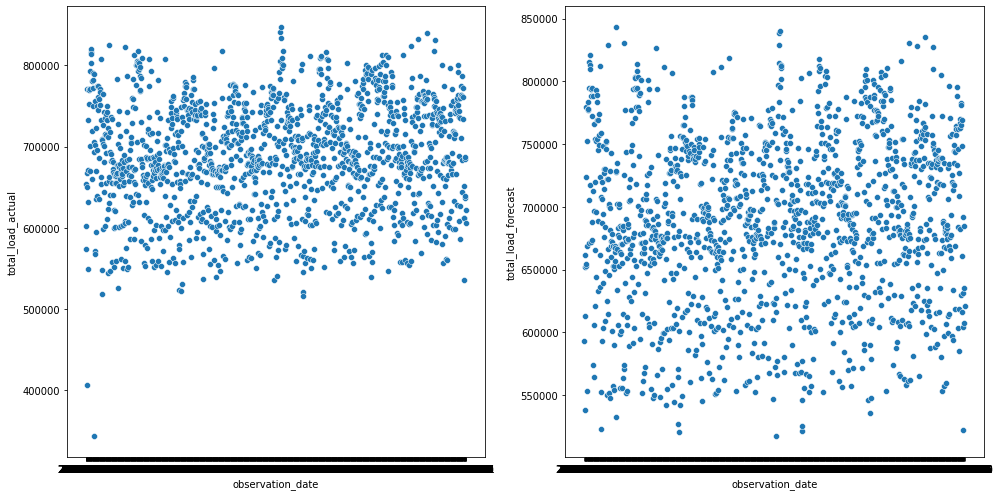

In [13]:
energy_df_grp_date = energy_df.groupby('observation_date')[['total_load_forecast','total_load_actual']].sum()

plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)

sbn.scatterplot(x="observation_date",y="total_load_actual",data=energy_df_grp_date, ax=axes[0])
sbn.scatterplot(x="observation_date",y="total_load_forecast",data=energy_df_grp_date, ax=axes[1])

In [40]:
energy_df.describe()

,generation_biomass,generation_fossil_brown_coal_lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
count,35045.000000,35046.000000,35046.000000,35046.000000,35045.000000,35045.000000,35045.000000,35046.000000,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.000000,35064.000000,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,5622.737488,4256.065742,298.319789,475.577343,972.116108,2605.114735,6263.907039,60.228585,85.639702,1432.665925,269.452133,5464.479769,1439.066735,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,2201.830478,1961.601013,52.520673,792.406614,400.777536,1835.199745,839.667958,20.238381,14.077554,1680.119887,50.195536,3213.691587,1677.703355,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1077.250000,5760.000000,53.000000,73.000000,71.000000,240.000000,2933.000000,69.000000,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,4969.000000,4474.000000,300.000000,68.000000,906.000000,2164.000000,6566.000000,57.000000,88.000000,616.000000,279.000000,4849.000000,576.000000,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,6429.000000,5838.750000,330.000000,616.000000,1250.000000,3757.000000,7025.000000,80.000000,97.000000,2578.000000,310.000000,7398.000000,2636.000000,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,5836.000000,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [39]:
energy_df.columns

Index(['time', 'generation_biomass', 'generation_fossil_brown_coal_lignite',
       'generation_fossil_gas', 'generation_fossil_hard_coal',
       'generation_fossil_oil', 'generation_hydro_pumped_storage_consumption',
       'generation_hydro_run_of_river_and_poundage',
       'generation_hydro_water_reservoir', 'generation_nuclear',
       'generation_other', 'generation_other_renewable', 'generation_solar',
       'generation_waste', 'generation_wind_onshore',
       'forecast_solar_day_ahead', 'forecast_wind_onshore_day_ahead',
       'total_load_forecast', 'total_load_actual', 'price_day_ahead',
       'price_actual'],
      dtype='object')

In [32]:
energy_df['generation_marine'].describe()

count    35045.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: generation_marine, dtype: float64

In [38]:
columns_to_drop = ['generation_wind_offshore','generation_fossil_coal_derived_gas','generation_fossil_oil_shale','generation_fossil_peat'
                   ,'generation_geothermal','generation_hydro_pumped_storage_aggregated','forecast_wind_offshore_eday_ahead','generation_marine']

for i in columns_to_drop:
    energy_df.drop(i, axis=1, inplace=True)  

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)

sbn.scatterplot(x="observation_hour",y="price_actual",data=energy_df_grp_hour, ax=axes[0])
sbn.scatterplot(x="observation_hour",y="price_day_ahead",data=energy_df_grp_hour, ax=axes[1])

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)

sbn.scatterplot(x="observation_year",y="price_actual",data=energy_df_grp_year, ax=axes[0])
sbn.scatterplot(x="observation_year",y="price_day_ahead",data=energy_df_grp_year, ax=axes[1])

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)

sbn.scatterplot(x="observation_month",y="price_actual",data=energy_df_grp_month, ax=axes[0])
sbn.scatterplot(x="observation_month",y="price_day_ahead",data=energy_df_grp_month, ax=axes[1])

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)

sbn.scatterplot(x="observation_day",y="price_actual",data=energy_df_grp_day, ax=axes[0])
sbn.scatterplot(x="observation_day",y="price_day_ahead",data=energy_df_grp_day, ax=axes[1])